In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import matplotlib.colorbar as cmap
import matplotlib.colors as colors


# Chargement des validations ferrées par jour sur le premier semestre

In [4]:
#ce fichier est disponible sur le site du STIF 
#https://opendata.stif.info/explore/dataset/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-sem/?tab=metas
rawstif = pd.read_csv('../../../Downloads/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-sem.csv',sep=';')
rawstif.head(2)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2015-01-01,100,110,414,LA DEFENSE-GRANDE ARCHE,71517,NAVIGO,760
1,2015-01-01,100,110,420,LA MOTTE-PICQUET-GRENELLE,71199,FGT,146


In [5]:
print(rawstif['ID_REFA_LDA'].nunique())
#le réseau ferré comporte 721 arrêts...

721


## Création d'une table des validations par titre et par arrêt

In [6]:
# On somme les validations pour tous les jours et pour chaque arrêt
table = pd.pivot_table(rawstif, values='NB_VALD', index=['CODE_STIF_TRNS','ID_REFA_LDA','LIBELLE_ARRET'], columns='CATEGORIE_TITRE',aggfunc=np.sum)
table.head(2)

CATEGORIE_TITRE                                                 AMETHYSTE  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                    
100            69884       CRETEIL-P. LAC                           35124   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)      89827   

CATEGORIE_TITRE                                                 AUTRE TITRE  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                      
100            69884       CRETEIL-P. LAC                             22398   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)        22407   

CATEGORIE_TITRE                                                    FGT  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                 
100            69884       CRETEIL-P. LAC                        70636   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)  162204   

CATEGORIE_TITRE                                                 IMAGINE R  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                    
100            69884       CRETEIL-P. LAC                          264482   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)     447596   

CATEGORIE_TITRE                                                 NAVIGO  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                 
100            69884       CRETEIL-P. LAC                       578551   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)  981044   

CATEGORIE_TITRE                                                 NON DEFINI  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                     
100            69884       CRETEIL-P. LAC                              NaN   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)         NaN   

CATEGORIE_TITRE                                                    TST  
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                
100            69884       CRETEIL-P. LAC                        78029  
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)  183353

In [7]:
table.fillna(0, inplace=True)
#on retire les NA pour les remplacer âr des zéros... et on ajoute une colonne somme de toutes les validations...
table['TOTALV']=table['AMETHYSTE']+table['AUTRE TITRE']+table['FGT']+table['IMAGINE R']+table['NAVIGO']+table['NON DEFINI']+table['TST']

In [8]:
table.head(2)

CATEGORIE_TITRE                                                 AMETHYSTE  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                    
100            69884       CRETEIL-P. LAC                           35124   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)      89827   

CATEGORIE_TITRE                                                 AUTRE TITRE  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                      
100            69884       CRETEIL-P. LAC                             22398   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)        22407   

CATEGORIE_TITRE                                                    FGT  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                 
100            69884       CRETEIL-P. LAC                        70636   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)  162204   

CATEGORIE_TITRE                                                 IMAGINE R  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                    
100            69884       CRETEIL-P. LAC                          264482   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)     447596   

CATEGORIE_TITRE                                                 NAVIGO  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                 
100            69884       CRETEIL-P. LAC                       578551   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)  981044   

CATEGORIE_TITRE                                                 NON DEFINI  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                     
100            69884       CRETEIL-P. LAC                                0   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)           0   

CATEGORIE_TITRE                                                    TST  \
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                 
100            69884       CRETEIL-P. LAC                        78029   
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)  183353   

CATEGORIE_TITRE                                                  TOTALV  
CODE_STIF_TRNS ID_REFA_LDA LIBELLE_ARRET                                 
100            69884       CRETEIL-P. LAC                       1049220  
               70021       CRETEIL-PREFECTURE (HOTEL DE VILLE)  1886431

In [9]:
TableV=table
# on transforme la "pivot table" en simple "table"
TableV.reset_index( inplace=True)
TableV.tail(2)


CATEGORIE_TITRE,CODE_STIF_TRNS,ID_REFA_LDA,LIBELLE_ARRET,AMETHYSTE,AUTRE TITRE,FGT,IMAGINE R,NAVIGO,NON DEFINI,TST,TOTALV
742,810,74265,SCEAUX,7081,10433,7252,57909,169423,0,11876,263974
743,810,412697,NOISY-LE-GRAND-MONT D'EST,71893,139633,181456,417936,1821369,0,215368,2847655


In [10]:
pd.unique(rawstif.CODE_STIF_TRNS)
#on examine les codes transporteurs

array([100, 800, 810], dtype=int64)

In [11]:
# on récupère le fichier des arrêts notamment pour avoir les coordonnées 
arret=pd.read_pickle('arrets_stif')
arret.head(1)

,ZDEr_ID_REF_A,ZDEr_NOM,ZDEr_ID_TYPE_ARRET,ZDEr_LIBELLE_TYPE_ARRET,ZDEr_X_Y,ZDLr_ID_REF_A,ZDLr_NOM,ZDLr_ID_TYPE_ARRET,ZDLr_LIBELLE_TYPE_ARRET,LDA_ID_REF_A,LDA_NOM,LDA_ID_TYPE_ARRET,LDA_LIBELLE_TYPE_ARRET,X,Y
0,7895,LA DEFENSE-METRO-RER-TRAMWAY,5,Arrêt de bus,"644081.4,6865998",43536,La Défense (Grande Arche),1,Gare ferrée,71517,La Défense (Grande Arche),1,Gare ferrée,644081.4,6865998


In [12]:
print(arret['LDA_ID_REF_A'].nunique())
print(TableV['ID_REFA_LDA'].nunique())
# le fichiers des arrêts contient aussi des arrêt de bus (hors réseau ferré).

15389
721


In [13]:
arret2 = arret.rename(columns={'LDA_ID_REF_A': 'ID_REFA_LDA'})
#on renome la colonne de l'identifiant unique d'arrêt dont le nom n'est pas le même dans les deux tablesarret2.head(2)
#arret2 = arret.rename(columns={'CATEGORIE_TITRE': 'NUM'})
#on renome la colonne CATEGORIE_TITRE dont le nom ne corresponds pas au contenu...


In [14]:
#on effectue la jointure entre les deux tables
TableVLoc=pd.merge(left=TableV, right = arret2, on= 'ID_REFA_LDA')
TableVLoc.head(2)

CATEGORIE_TITRE,CODE_STIF_TRNS,ID_REFA_LDA,LIBELLE_ARRET,AMETHYSTE,AUTRE TITRE,FGT,IMAGINE R,NAVIGO,NON DEFINI,TST,...,ZDEr_X_Y,ZDLr_ID_REF_A,ZDLr_NOM,ZDLr_ID_TYPE_ARRET,ZDLr_LIBELLE_TYPE_ARRET,LDA_NOM,LDA_ID_TYPE_ARRET,LDA_LIBELLE_TYPE_ARRET,X,Y
0,100,69884,CRETEIL-P. LAC,35124,22398,70636,264482,578551,0,78029,...,"660691.133,6852283.439",44453,Pointe du Lac,2,Station de métro,Pointe du Lac,2,Station de métro,660691.133,6852283.439
1,100,69884,CRETEIL-P. LAC,35124,22398,70636,264482,578551,0,78029,...,"660579.553,6852206.425",44453,Pointe du Lac,2,Station de métro,Pointe du Lac,2,Station de métro,660579.553,6852206.425


In [15]:
#on sauvegarde le résultat :l les validations, par arrêts de réseau ferré avec les localisations.
TableVLoc.to_pickle('validations_localisees')


## Carte des visualisation des validations sur les arrêts du réseau ferré en Ile de France 

C:\Users\Bricolo\Anaconda3\envs\lty\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


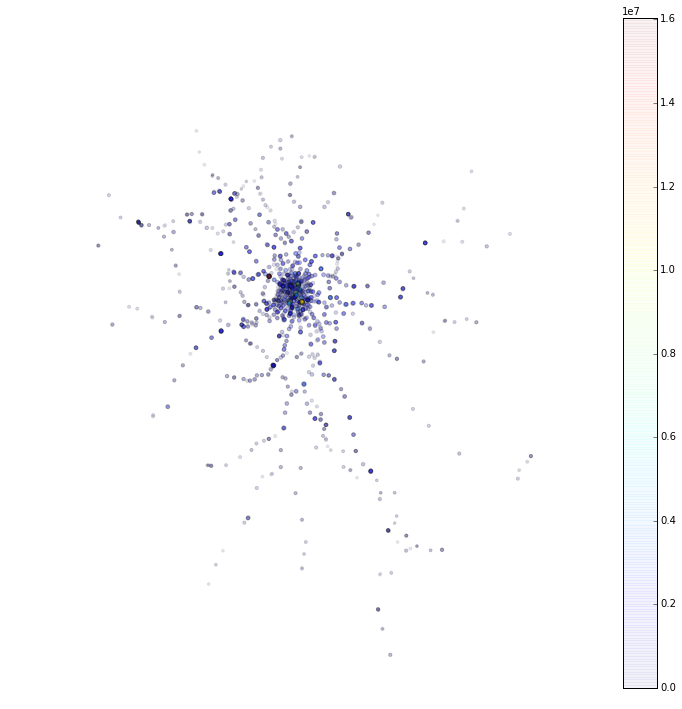

In [16]:
#on visualise
plt.figure(figsize=(12,12)) 
#print(TableVLoc['TOTALV'].max())
#print(TableVLoc['TOTALV'].min())
s=np.log(TableVLoc['TOTALV'])
plt.scatter(TableVLoc['X'], TableVLoc['Y'], c=TableVLoc['TOTALV'],s=s, alpha=0.05)
plt.colorbar()
plt.axis('off')
plt.show()

## Histogramme des validations par arrêt sur le réseau ferré en Ile de France

In [18]:
#on extrait une table plus petite avec les champs qu'on cherche à visualiser
table5=TableVLoc[['TOTALV', 'LDA_NOM', 'ID_REFA_LDA','LDA_LIBELLE_TYPE_ARRET','LDA_ID_TYPE_ARRET','CODE_STIF_TRNS']]
table5.sort_values(['TOTALV'], ascending=['TOTALV'], inplace=True)
table5.drop_duplicates(inplace=True)
table6=table5.tail(100)
table6.reset_index(drop=True, inplace=True)
LABELS=table6['LDA_NOM']
TypArret=table6['LDA_LIBELLE_TYPE_ARRET'].unique()
print(TypArret)
print(table6['LDA_ID_TYPE_ARRET'].unique())


C:\Users\Bricolo\Anaconda3\envs\lty\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Bricolo\Anaconda3\envs\lty\lib\site-packages\pandas\util\decorators.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


['Station de métro' 'Gare ferrée']
[2 1]


In [19]:
colorrange=  { 800: "purple", 100:"green", 810:"blue"}
table6.replace({'CODE_STIF_TRNS': colorrange},inplace=True)
c=table6['CODE_STIF_TRNS']
c.head(5)

C:\Users\Bricolo\Anaconda3\envs\lty\lib\site-packages\pandas\core\generic.py:2936: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


0    green
1    green
2    green
3    green
4    green
Name: CODE_STIF_TRNS, dtype: object

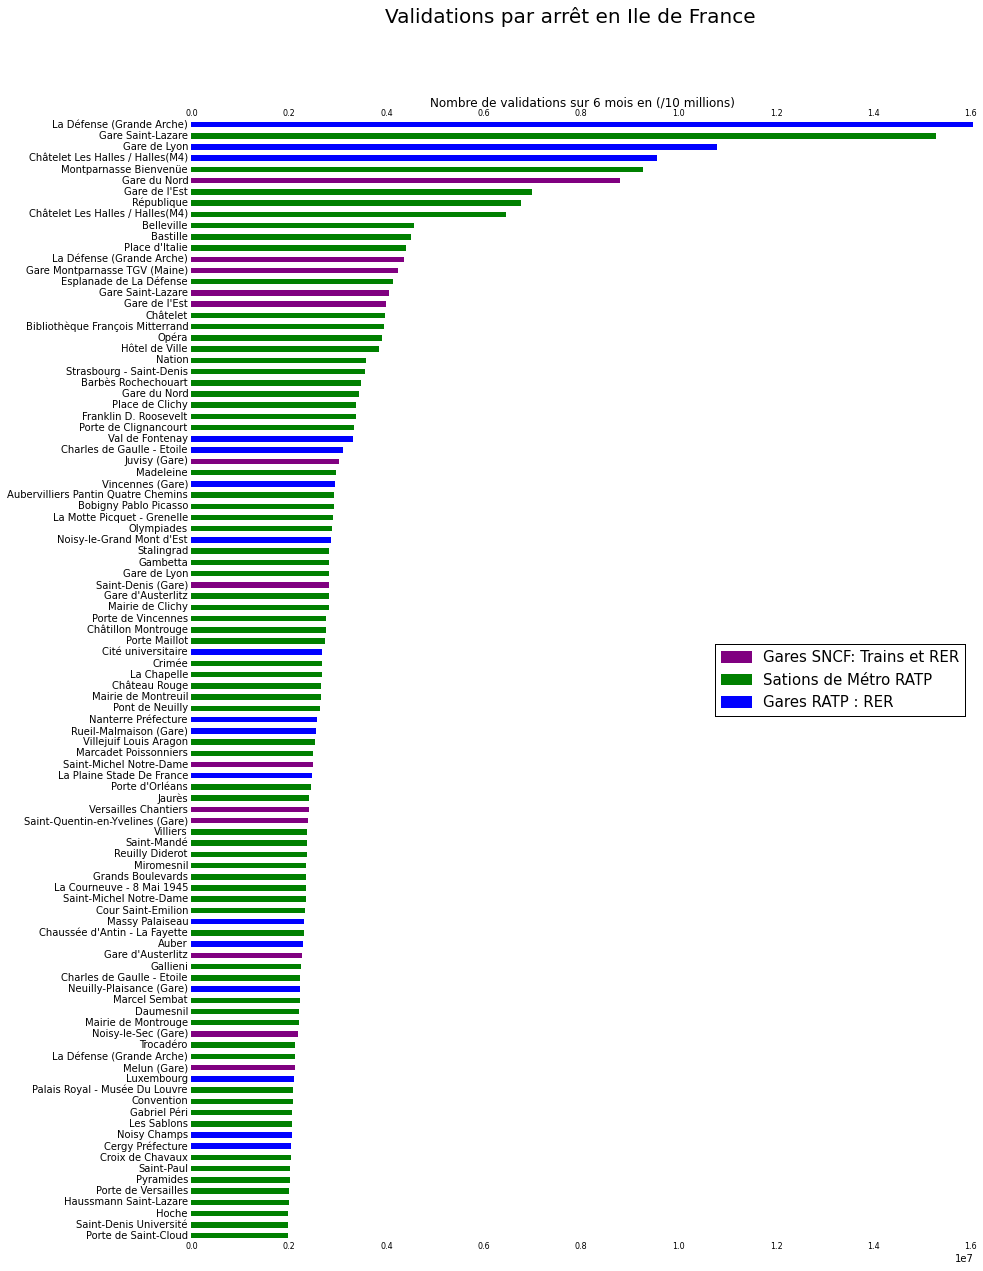

In [27]:
fig = plt.figure(figsize=[14,20])
#ax1 = plt.subplot(1,1,1)
ax1 = plt.subplot()

plt.suptitle('Validations par arrêt en Ile de France', fontsize=20)
plt.title('Nombre de validations sur 6 mois en (/10 millions)', fontsize=12,  y=1.01)

plt.barh(table6.index,table6['TOTALV'],align='center', height=0.4, color=c, edgecolor=c)

ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)
ax1.axis('tight') 
# turn off ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on",labeltop="on", left="off", right="off", labelleft="on",labelsize=8)
plt.yticks(table6.index, LABELS, fontsize=10)


purple_patch = mpatches.Patch(color='purple', label='Gares SNCF: Trains et RER')
green_patch = mpatches.Patch(color='green', label='Sations de Métro RATP')
blue_patch = mpatches.Patch(color='blue', label='Gares RATP : RER')
axbox = ax1.get_position()
plt.legend(handles=[purple_patch, green_patch, blue_patch],  fontsize=15, loc= 5)

plt.show()